In [1]:
#1. Global Earthquakes
#In this problem set, we will use this file from the USGS Earthquakes Database. 
#The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. 
#Use the mag column for magnitude. [10 points]

In [8]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

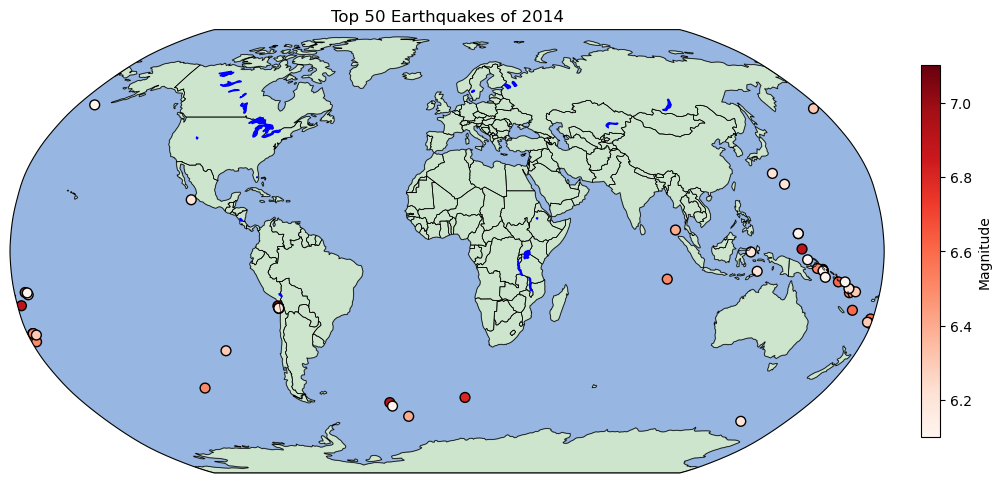

In [10]:

# 读取数据
df = pd.read_csv('usgs_earthquakes.csv')

# 将 'updated' 列转换为 datetime 对象，以便筛选2014年的数据
df['updated'] = pd.to_datetime(df['updated'])

# 筛选2014年的数据
df_2014 = df[df['updated'].dt.year == 2014]

# 选择震级最大的50个地震
top_50 = df_2014.nlargest(50, 'mag')

# 使用预设的 'Reds' 颜色映射（红色系）
cmap = plt.cm.Reds

# 标准化震级范围
norm = mcolors.Normalize(vmin=top_50['mag'].min(), vmax=top_50['mag'].max())

# 创建投影
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()  

# 添加自然特征到地图
ax.add_feature(cfeature.OCEAN, zorder=0)  # Ocean
ax.add_feature(cfeature.LAND , edgecolor='black', facecolor='green', alpha=0.2, zorder=1)  # Land
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)  # Lakes

# 添加国家边界
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# 映射经纬度坐标
scatter = ax.scatter(top_50['longitude'].values, top_50['latitude'].values, 
                     c=top_50['mag'], cmap=cmap, norm=norm, s=50, edgecolor='black', 
                     transform=ccrs.PlateCarree())

# 设置颜色条
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Magnitude')

# 设置标题
plt.title('Top 50 Earthquakes of 2014')

# 显示地图
plt.show()



In [ ]:
#Explore a netCDF dataset
#Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.
#2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).
#2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

In [12]:
import os
import re
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [14]:
#先打开一个打开 netCDF 文件看一下有哪些变量
with nc.Dataset('E:/course/ESE_COURSE/PS3/output_file/oco2_GEOS_L3CO2_month_201501_B10206Ar.nc4' ) as dataset:
    # 打印所有变量名称
    print("Variables in the file:")
    for var in dataset.variables:
        print(var)
        

Variables in the file:
XCO2
XCO2PREC
lat
lon
time


In [16]:
# 设置数据目录
data_dir = 'E:/course/ESE_COURSE/PS3/output_file'

# 获取所有 netCDF 文件
nc_files = [f for f in os.listdir(data_dir) if f.endswith('.nc4')]

In [18]:
#2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).


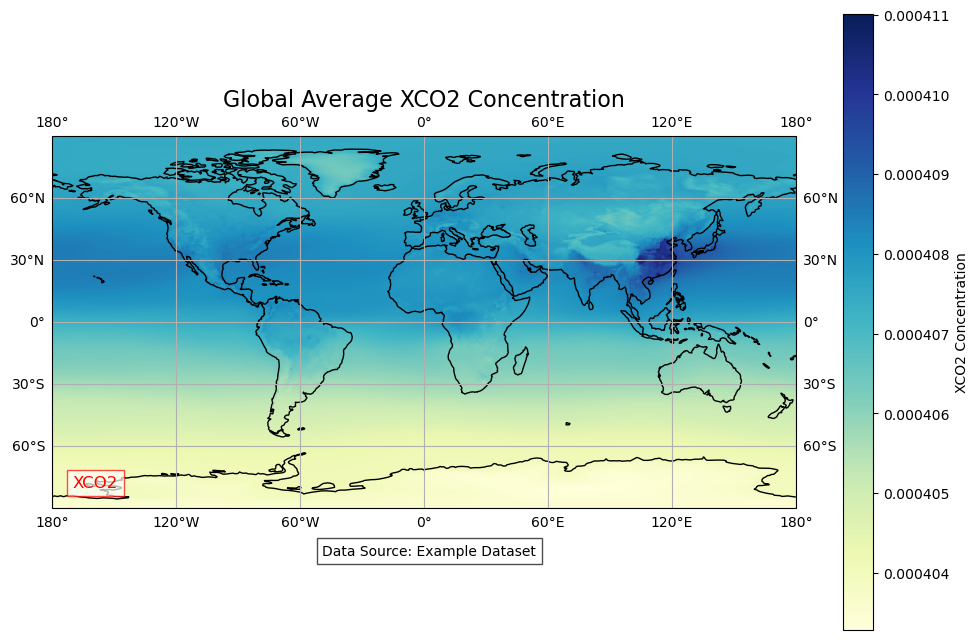

In [32]:
# 读取所有 nc 文件并提取 XCO2 数据
xco2_data = []
latitudes = None
longitudes = None

for file in nc_files:
    file_path = os.path.join(data_dir, file)
    ds = xr.open_dataset(file_path)
    # 选择 XCO2 变量
    xco2 = ds['XCO2'].values  # (time, lat, lon) 
    # 获取纬度和经度
    if latitudes is None or longitudes is None:
        latitudes = ds['lat'].values
        longitudes = ds['lon'].values
    # 计算每个文件的 XCO2均值
    xco2_data.append(xco2.mean(axis=0))  
# 所有文件的均值
xco2_mean = np.mean(np.array(xco2_data), axis=0)
# 绘制全球地图
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制海岸线和网格
ax.coastlines()
ax.gridlines(draw_labels=True)

# 设置颜色
cmap = plt.get_cmap('YlGnBu')
norm = mcolors.Normalize(vmin=np.min(xco2_mean), vmax=np.max(xco2_mean))

# 计算 XCO2平均值数据
pcm = ax.pcolormesh(longitudes, latitudes, xco2_mean, cmap=cmap, norm=norm, shading='auto')

# 添加颜色条
cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', label='XCO2 Concentration')

# 设置标题和坐标标签
ax.set_title('Global Average XCO2 Concentration', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 添加注释
ax.text(-170, -80, 'XCO2', fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.7, edgecolor='red'))

# 添加文本框
fig.text(0.35, 0.2, 'Data Source: Example Dataset', fontsize=10, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.7))

# 显示图形
plt.show()


In [ ]:
#2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

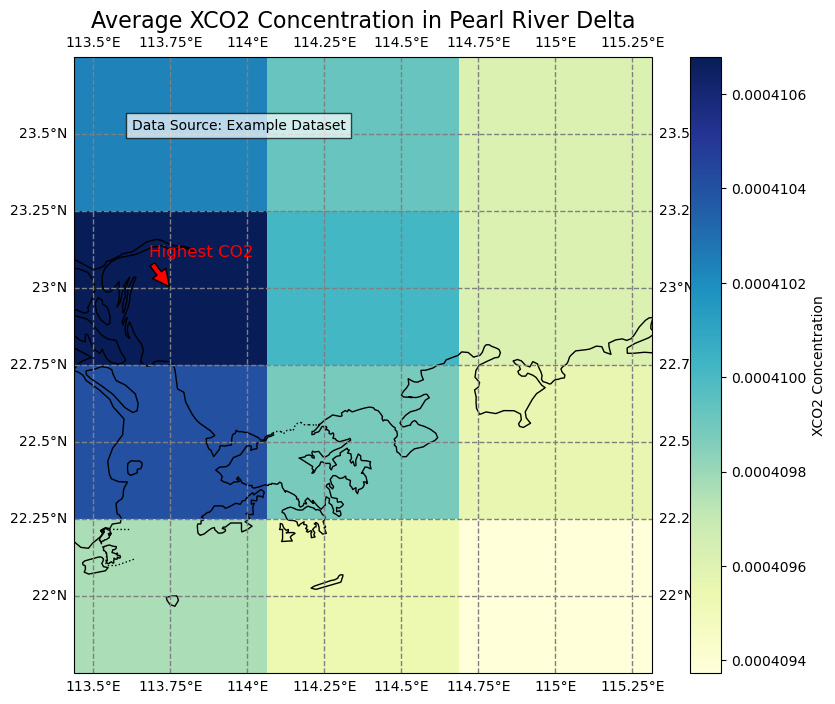

In [58]:
# 设置珠三角地区的经纬度范围
lat_min, lat_max = 22.0, 23.5  
lon_min, lon_max = 113.5, 115.5  

# 筛选经纬度范围内的数据
lat_idx = np.where((latitudes >= lat_min) & (latitudes <= lat_max))[0]
lon_idx = np.where((longitudes >= lon_min) & (longitudes <= lon_max))[0]

# 提取局部区域的 XCO2 数据
xco2_mean_local = xco2_mean[lat_idx, :][:, lon_idx]
latitudes_local = latitudes[lat_idx]
longitudes_local = longitudes[lon_idx]

# 使用Cartopy的PlateCarree投影
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 添加地图背景特征
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 添加网格线
ax.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='--')

# 设置颜色映射
cmap = plt.get_cmap('YlGnBu')
norm = mcolors.Normalize(vmin=np.min(xco2_mean_local), vmax=np.max(xco2_mean_local))

# 绘制 XCO2 平均值数据
pcm = ax.pcolormesh(longitudes_local, latitudes_local, xco2_mean_local, cmap=cmap, norm=norm, shading='auto')

# 颜色条
cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', label='XCO2 Concentration')

# 设置标题和坐标标签
ax.set_title('Average XCO2 Concentration in Pearl River Delta', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 添加文本框
plt.text(0.1, 0.9, 'Data Source: Example Dataset', transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))

# 找到 XCO2 最大值的位置
max_idx = np.unravel_index(np.argmax(xco2_mean_local), xco2_mean_local.shape)
max_lat = latitudes_local[max_idx[0]] 
max_lon = longitudes_local[max_idx[1]]  
max_value = xco2_mean_local[max_idx]    

# 添加注释，指向 XCO2 最大值
ax.annotate('Highest CO2',xy=(max_lon, max_lat), 
            xytext=(max_lon + 0.1, max_lat + 0.1),
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontsize=12, color='red', ha='center')

# 显示图形
plt.show()
